# Shipping Cost and Time Prediction

**Description:**

***Problem Statement:*** On the basis of the historic trend and attributes, Predict the shipping time required to deliver the package for the logistics.
The notebook showcases the exploratory data analysis and Machine Learning model for Shipping Time prediction.


**Dataset:**
The supply chain logistics shipment data is available free of charge at: https://www.usaid.gov/opengov/developer/datasets/SCMS_Delivery_History_Dataset_20150929.csv


**Contents:**
1. Import Libraries
2. Data Loading
3. Feature Engineering and Exploratory Data Analysis
4. Machine Learning model for Shipping Time Prediction
5. Conclusion
6. Save the ML Model


**Requirements:** This project requires **Python 3.6** and the following Python libraries installed:

- [NumPy](http://www.numpy.org/)
- [Pandas](http://pandas.pydata.org)
- [matplotlib](http://matplotlib.org/)
- [Seaborn](https://seaborn.pydata.org/)
- [scikit-learn](http://scikit-learn.org/stable/)




## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

## 2. Data Loading

In [2]:
dataset_path = r"Dataset/SCMS_Delivery_History_Dataset.csv"
df = pd.read_csv(dataset_path, encoding='latin-1')

In [3]:
df

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,HRDT,HIV test,Abbott GmbH & Co. KG,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,NaN,Test kit,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,ARV,Adult,Aurobindo Pharma Limited,"Stavudine 30mg, capsules, 60 Caps",Stavudine,Generic,30mg,Capsule,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10319,86818,103-ZW-T30,FPQ-15197,SO-50020,DN-4307,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,10/16/2014,N/A - From RDC,31-Jul-15,15-Jul-15,20-Jul-15,ARV,Pediatric,SCMS from RDC,"Lamivudine/Nevirapine/Zidovudine 30/50/60mg, d...",Lamivudine/Nevirapine/Zidovudine,Generic,30/50/60mg,Chewable/dispersible tablet - FDC,60,166571,599655.60,3.60,0.06,"Mylan, H-12 & H-13, India",No,See DN-4307 (ID#:83920),See DN-4307 (ID#:83920),705.79
10320,86819,104-CI-T30,FPQ-15259,SO-50102,DN-4313,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,10/24/2014,N/A - From RDC,31-Jul-15,6-Aug-15,7-Aug-15,ARV,Adult,SCMS from RDC,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,Generic,150/300mg,Tablet - FDC,60,21072,137389.44,6.52,0.11,Hetero Unit III Hyderabad IN,No,See DN-4313 (ID#:83921),See DN-4313 (ID#:83921),161.71
10321,86821,110-ZM-T30,FPQ-14784,SO-49600,DN-4316,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,8/12/2014,N/A - From RDC,31-Aug-15,25-Aug-15,3-Sep-15,ARV,Adult,SCMS from RDC,Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...,Efavirenz/Lamivudine/Tenofovir Disoproxil Fuma...,Generic,600/300/300mg,Tablet - FDC,30,514526,5140114.74,9.99,0.33,Cipla Ltd A-42 MIDC Mahar. IN,No,Weight Captured Separately,Freight Included in Commodity Cost,5284.04
10322,86822,200-ZW-T30,FPQ-16523,SO-51680,DN-4334,Zimbabwe,PMO - US,From RDC,N/A - From RDC,Truck,7/1/2015,N/A - From RDC,9-Sep-15,4-Aug-15,11-Aug-15,ARV,Adult,SCMS from RDC,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,Generic,150/300mg,Tablet - FDC,60,17

## 3. Exploratory Data Analysis

In [4]:
df.shape

(10324, 33)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

In [6]:
df.isnull().sum()

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

In [7]:
df['Shipment Mode'].value_counts()

Air            6113
Truck          2830
Air Charter     650
Ocean           371
Name: Shipment Mode, dtype: int64

In [8]:
df['Fulfill Via'].value_counts()

From RDC       5404
Direct Drop    4920
Name: Fulfill Via, dtype: int64

In [9]:
df['Vendor INCO Term'].value_counts()

N/A - From RDC    5404
EXW               2778
DDP               1443
FCA                397
CIP                275
DDU                 15
DAP                  9
CIF                  3
Name: Vendor INCO Term, dtype: int64

In [10]:
df['Product Group'].value_counts()

ARV     8550
HRDT    1728
ANTM      22
ACT       16
MRDT       8
Name: Product Group, dtype: int64

In [11]:
df['Sub Classification'].value_counts()

Adult                   6595
Pediatric               1955
HIV test                1567
HIV test - Ancillary     161
Malaria                   30
ACT                       16
Name: Sub Classification, dtype: int64

In [12]:
df['Molecule/Test Type'].value_counts()

Efavirenz                                1125
Nevirapine                                877
Lamivudine/Nevirapine/Zidovudine          707
Lamivudine/Zidovudine                     689
Lopinavir/Ritonavir                       633
                                         ... 
Primaquine base (as diphosphate)            1
Lamivudine/Zidovudine+Abacavir              1
Nelfinavir                                  1
Malaria Antigen P.f , HRP2, Kit             1
HIV 1/2, ImmunoComb II BiSpot EIA Kit       1
Name: Molecule/Test Type, Length: 86, dtype: int64

In [13]:
unique_val = []
for i in df['Molecule/Test Type'].value_counts().keys():
    arr1 = i.split(',')
    for j in arr1:
        if j.strip() not in unique_val:
            unique_val.append(j.strip())

In [14]:
len(unique_val)

118

In [15]:

for i in unique_val:
    df[i] = df['Molecule/Test Type'].apply(lambda s: s.count(i))

In [16]:
df

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),Efavirenz,Nevirapine,Lamivudine/Nevirapine/Zidovudine,Lamivudine/Zidovudine,Lopinavir/Ritonavir,Lamivudine,HIV 1/2,Determine Complete HIV Kit,Zidovudine,Abacavir,Uni-Gold HIV Kit,Tenofovir Disoproxil Fumarate,Lamivudine/Tenofovir Disoproxil Fumarate,Lamivudine/Nevirapine/Stavudine,Efavirenz/Lamivudine/Tenofovir Disoproxil Fumarate,Stavudine,Didanosine,Emtricitabine/Tenofovir Disoproxil Fumarate,Lamivudine/Stavudine,Efavirenz/Emtricitabine/Tenofovir Disoproxil Fumarate,Determine HIV Kit,without Lancets,Abacavir/Lamivudine,Ritonavir,Stat-Pak HIV,Kit,Bioline 3.0 Kit,Lancets,Capillary pipets,Alcohol swabs included,Colloidal Gold,Diagnostic Kit,Antibody,HIV,Lancet,Safety,for HIV Test kits,100 Pcs,Atazanavir/Ritonavir,Saquinavir,OraQuick Advance HIV Rapid Antibody Kit,Raltegravir,Darunavir,Didanosine EC,Chase Buffer,Determine,100 Tests,2.5ml x 1 Vial,Indinavir,Capillus HIV Kit,Capillary Tubes,for Determine,EDTA,50uL,Etravirine,Atazanavir,Abacavir/Lamivudine/Zidovudine,Genie II HIV-1/HIV-2 Kit,Bioline 3.0 Kit (no accessories),Clearview Complete Kit,Stat-Pak Dipstick Assay Kit,HIV 1/2/O,First Response HIV 1-2.0,v.3.0 Cards Kit,Sulfadoxine/Pyrimethamine,Artemether/Lumefantrine,OraQuick Controls Kit,3 Vials,Nelfinavir (as mesilate),Determine Kit without Lancets,Buffer or Capillary Tubes,Lamivudine/Zidovudine+Nevirapine,Genie III Kit,Lamivudine/Zidovudine+Efavirenz,Multispot HIV-1/HIV-2 Rapid Test Kit,Malaria Paramax-3 Kit,Bioline 3.0 Diluent,25 Tests,HIV 1,Uni-Gold Recombigen HIV Control,Vial 2 x 0.5 ml,Artesunate+Amodiaquine,INSTI HIV Antibody Individual POC,1 Test,HIV 2,New LAV Blot 2 HIV Kit,Reveal G3 Rapid HIV-1 Antibody Test,HEXAGON Rapid HIV Kit,DoubleCheck Gold Kit,Chloroquine base (as phosphate),Bioline HIV 1/2 3.0 Kit,OraQuick Rapid Antibody Kit,Bundi Rapid HIV Kit,DoubleCheck II Kit,InstantChek HIV 1+2 Kit,Quinine (as dihydrochloride),ImmunoComb TriSpot Ag - Ab Kit,Stat-Pak Buffer Only,Malaria Antigen P.f Kit,30 x 1 Test,Malaria,Antigen P.f.,HRP2 CareStart Kit,Pepti-LAV 1|2 (HIV-1|2 Ab differenciation,Immuno-Blot),Diagnostic Kit Set (includes lancet,transfer pipette & alcohol prep pad),Mefloquine (as hydrochloride),Visitect Kit,Quinine (as sulfate),INSTI HIV 1/2 Antibody Kit,Quinine,Primaquine base (as diphosphate),Lamivudine/Zidovudine+Abacavir,Nelfinavir,Malaria Antigen P.f,HRP2,ImmunoComb II BiSpot EIA Kit
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [17]:
len(df['Brand'].value_counts())

48

In [18]:
df['Dosage Form'].value_counts()

Tablet                                3532
Tablet - FDC                          2749
Test kit                              1575
Capsule                                729
Oral solution                          727
Chewable/dispersible tablet - FDC      239
Oral suspension                        214
Test kit - Ancillary                   161
Chewable/dispersible tablet            146
Delayed-release capsules               131
Delayed-release capsules - blister      41
Powder for oral solution                28
Tablet - FDC + co-blister               20
Tablet - FDC + blister                  15
Tablet - blister                        10
Injection                                6
Oral powder                              1
Name: Dosage Form, dtype: int64

In [19]:
df['Product Group'].value_counts()

ARV     8550
HRDT    1728
ANTM      22
ACT       16
MRDT       8
Name: Product Group, dtype: int64

Convert Date fields from object to Datetime fields

In [20]:
df['Scheduled Delivery Date'] = pd.to_datetime(df['Scheduled Delivery Date'], errors = "coerce", format = "%d-%b-%y")

In [21]:
df['Delivery Recorded Date'] = pd.to_datetime(df['Delivery Recorded Date'], errors = "coerce", format = "%d-%b-%y")

In [22]:
df['Diff in Delivery Date (Days)'] = df['Scheduled Delivery Date']-df['Delivery Recorded Date']

In [23]:
# Transform df['Delay in Delivery (Days)'] column into a float value removing trailing 'days' from values
df['Diff in Delivery Date (Days)'] = (df['Diff in Delivery Date (Days)'] / np.timedelta64(1, 'D')).astype('float64')

In [24]:
df['Diff in Delivery Date (Days)']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
10319    11.0
10320    -7.0
10321    -3.0
10322    29.0
10323    20.0
Name: Diff in Delivery Date (Days), Length: 10324, dtype: float64

In [25]:
df['Scheduled Delivery Date'].isnull().sum()

0

In [26]:
df['Diff in Delivery Date (Days)'].isnull().sum()

0

In [27]:
df['Manufacturing Site'].value_counts()

Aurobindo Unit III, India              3172
Mylan (formerly Matrix) Nashik         1415
Hetero Unit III Hyderabad IN            869
Cipla, Goa, India                       665
Strides, Bangalore, India.              540
                                       ... 
Premier Medical Corporation               1
Mepro Pharm Wadhwan Unit II               1
Gland Pharma, Hyderabad, IN               1
BUNDI INTERNATIONAL DIAGNOSTICS LTD       1
Remedica, Limassol, Cyprus                1
Name: Manufacturing Site, Length: 88, dtype: int64

In [28]:
df['Item Description'].value_counts()

Efavirenz 600mg, tablets, 30 Tabs                                   755
Nevirapine 200mg, tablets, 60 Tabs                                  623
Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs                   597
Lamivudine/Nevirapine/Zidovudine 150/200/300mg, tablets, 60 Tabs    580
HIV 1/2, Determine Complete HIV Kit, 100 Tests                      577
                                                                   ... 
Primaquine 15mg base (as diphosphate), tablets, 1000 Tabs             1
Nelfinavir 50mg/g [Viracept], oral powder, 144g                       1
HIV 1/2, ImmunoComb II BiSpot EIA Kit, 36 Tests                       1
Malaria, Antigen P.f., HRP2 CareStart Kit, 60 Tests                   1
Quinine sulphate 300mg, film coated tablet, 1000 Tabs                 1
Name: Item Description, Length: 184, dtype: int64

In [29]:
df['First Line Designation'].value_counts()

Yes    7030
No     3294
Name: First Line Designation, dtype: int64

In [30]:
df['First Line Designation'] = [1 if x == 'Yes' else 0 for x in df['First Line Designation'] ]

In [31]:
df['First Line Designation'].value_counts()

1    7030
0    3294
Name: First Line Designation, dtype: int64

In [32]:
df['Weight (Kilograms)'].value_counts()

Weight Captured Separately    1507
2                               29
6                               26
1                               23
5                               20
                              ... 
11603                            1
8693                             1
494                              1
4099                             1
See ASN-2403 (ID#:3386)          1
Name: Weight (Kilograms), Length: 4688, dtype: int64

In [33]:
df['Weight (Kilograms)'].replace('Weight Captured Separately', 0, inplace = True)
df['Weight (Kilograms)'] = [0 if "See" in str(x) else x for x in df['Weight (Kilograms)'] ]

In [34]:
df['Weight (Kilograms)'].value_counts()

0       3952
2         29
6         26
1         23
60        20
        ... 
4495       1
7867       1
2184       1
8433       1
2822       1
Name: Weight (Kilograms), Length: 3389, dtype: int64

In [35]:
# Update previously transformed zero values with mean value of data
df['Weight (Kilograms)'] = df['Weight (Kilograms)'].astype('int64')
df['Weight (Kilograms)'] = [x if x!=0 else df['Weight (Kilograms)'].mean() for x in df['Weight (Kilograms)']]

In [36]:
df['Weight (Kilograms)'].value_counts()

2113.574196     3953
2.000000          29
6.000000          26
1.000000          23
60.000000         20
                ... 
27094.000000       1
9790.000000        1
13509.000000       1
12766.000000       1
773.000000         1
Name: Weight (Kilograms), Length: 3388, dtype: int64

In [37]:
df['Freight Cost (USD)'].value_counts()

Freight Included in Commodity Cost    1442
Invoiced Separately                    239
9736.1                                  36
6147.18                                 27
13398.06                                16
                                      ... 
16868.38                                 1
19328.2                                  1
2259.81                                  1
3125.65                                  1
2808.12                                  1
Name: Freight Cost (USD), Length: 6733, dtype: int64

In [38]:
# Apply same transformations to freight cost feature
df['Freight Cost (USD)'].replace('Freight Included in Commodity Cost', 0, inplace = True)
df['Freight Cost (USD)'].replace('Invoiced Separately', 0, inplace = True)
df['Freight Cost (USD)'] = [0 if "See" in str(x) else x for x in df['Freight Cost (USD)']]

In [39]:
df['Freight Cost (USD)'].value_counts()

0           4126
9736.1        36
6147.18       27
7445.8        16
13398.06      16
            ... 
68046          1
10784.69       1
1896.49        1
22956          1
1171.2         1
Name: Freight Cost (USD), Length: 5433, dtype: int64

In [40]:
# Update previously transformed zero values with mean value of data
df['Freight Cost (USD)'] = df['Freight Cost (USD)'].astype('float64')
df['Freight Cost (USD)'] = [df['Freight Cost (USD)'].mean() if x == 0 else x for x in df['Freight Cost (USD)']]

In [41]:
df['Freight Cost (USD)'].value_counts()

6665.812612     4126
9736.100000       36
6147.180000       27
7445.800000       16
13398.060000      16
                ... 
8823.410000        1
12067.260000       1
12689.710000       1
34400.040000       1
0.750000           1
Name: Freight Cost (USD), Length: 5433, dtype: int64

In [42]:
df['Line Item Insurance (USD)'].value_counts()

0.00      54
0.02      37
0.07      33
0.06      30
0.05      30
          ..
84.08      1
423.40     1
88.48      1
362.68     1
126.71     1
Name: Line Item Insurance (USD), Length: 6722, dtype: int64

In [43]:
df['Line Item Insurance (USD)'].isnull().sum()

287

In [44]:
df['Line Item Insurance (USD)'].fillna(0, inplace = True)

In [45]:
df['Line Item Insurance (USD)'].isnull().sum()

0

In [46]:
df['Project Code'].value_counts()

116-ZA-T30    768
104-CI-T30    729
151-NG-T30    628
114-UG-T30    596
108-VN-T30    522
             ... 
201-UG-T30      1
100-GN-T30      1
900-GY-T30      1
103-UG-T30      1
A02-SN-T50      1
Name: Project Code, Length: 142, dtype: int64

## Visualizations

In [47]:
df.keys()

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       ...
       'Quinine (as sulfate)', 'INSTI HIV 1/2 Antibody Kit', 'Quinine',
       'Primaquine base (as diphosphate)', 'Lamivudine/Zidovudine+Abacavir',
       'Nelfinavir', 'Malaria Antigen P.f', 'HRP2',
       'ImmunoComb II BiSpot EIA Kit', 'Diff in Delivery Date (Days)'],
      dtype='object', length=152)

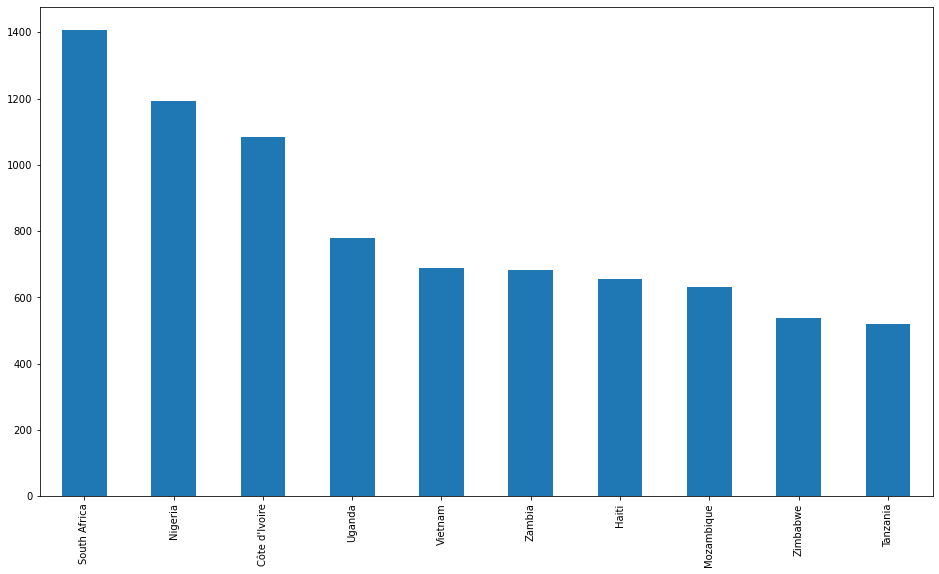

In [48]:
plt.figure(figsize = (16,9))
df['Country'].value_counts().head(10).plot.bar()

It means that maximum orders are from South Africa

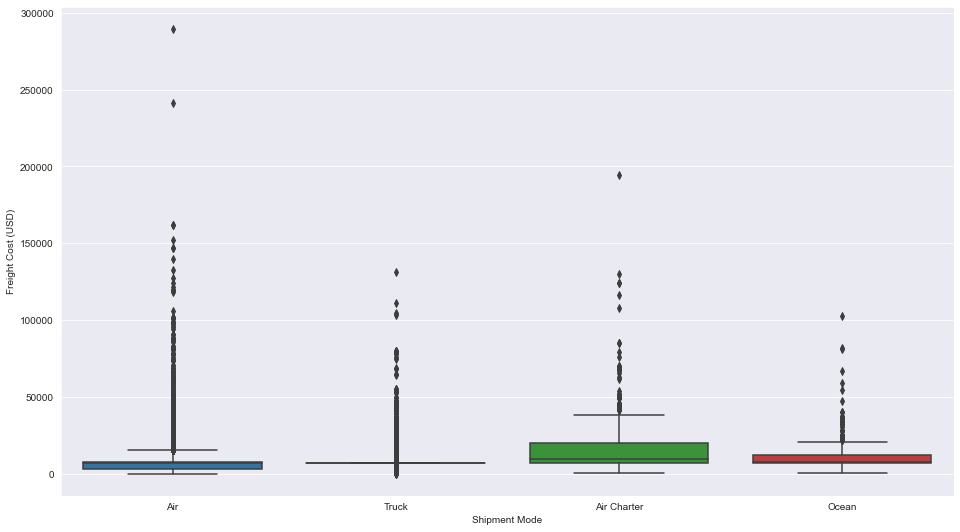

In [49]:
plt.figure(figsize = (16,9))
sns.set_style('darkgrid')
sns.boxplot(df['Shipment Mode'], df['Freight Cost (USD)'])

In [50]:
#Removing Outliner
dfr = [x for x in df['Freight Cost (USD)'] if x>180000 ]

In [51]:
len(dfr)

3

In [52]:

df_temp = df.drop(df[df['Freight Cost (USD)'] > 180000].index)

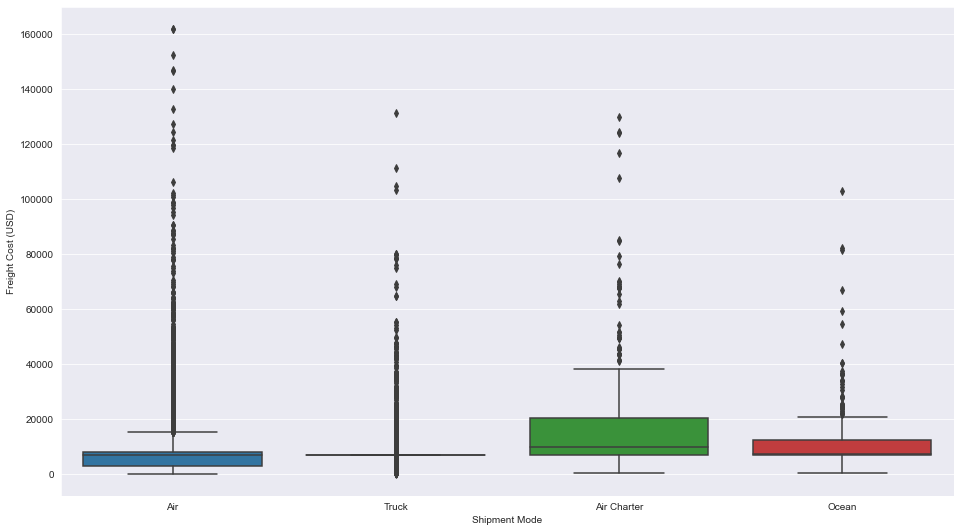

In [53]:
plt.figure(figsize = (16,9))
sns.set_style('darkgrid')
sns.boxplot(df_temp['Shipment Mode'],df_temp['Freight Cost (USD)'])

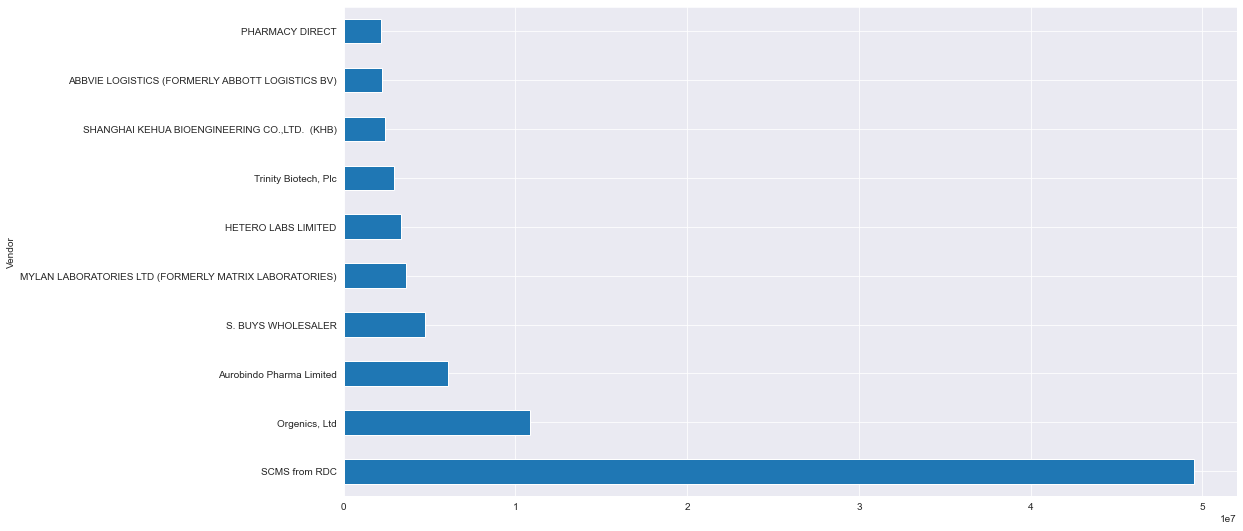

In [54]:
plt.figure(figsize = (16,9))
sns.set_style('darkgrid')
df.groupby('Vendor')['Freight Cost (USD)'].sum().sort_values(ascending = False).head(10).plot.barh()

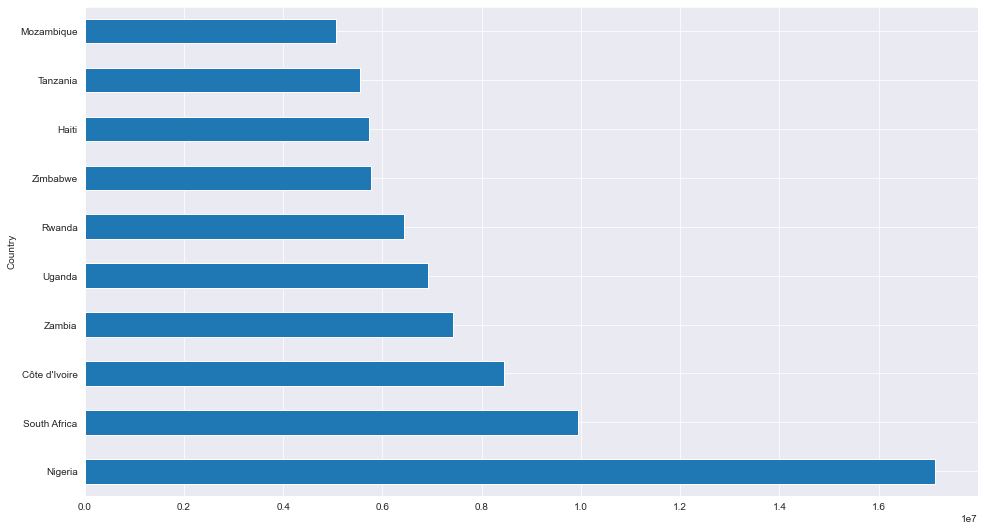

In [55]:
plt.figure(figsize = (16,9))
sns.set_style('darkgrid')
df.groupby('Country')['Freight Cost (USD)'].sum().sort_values(ascending = False).head(10).plot.barh()

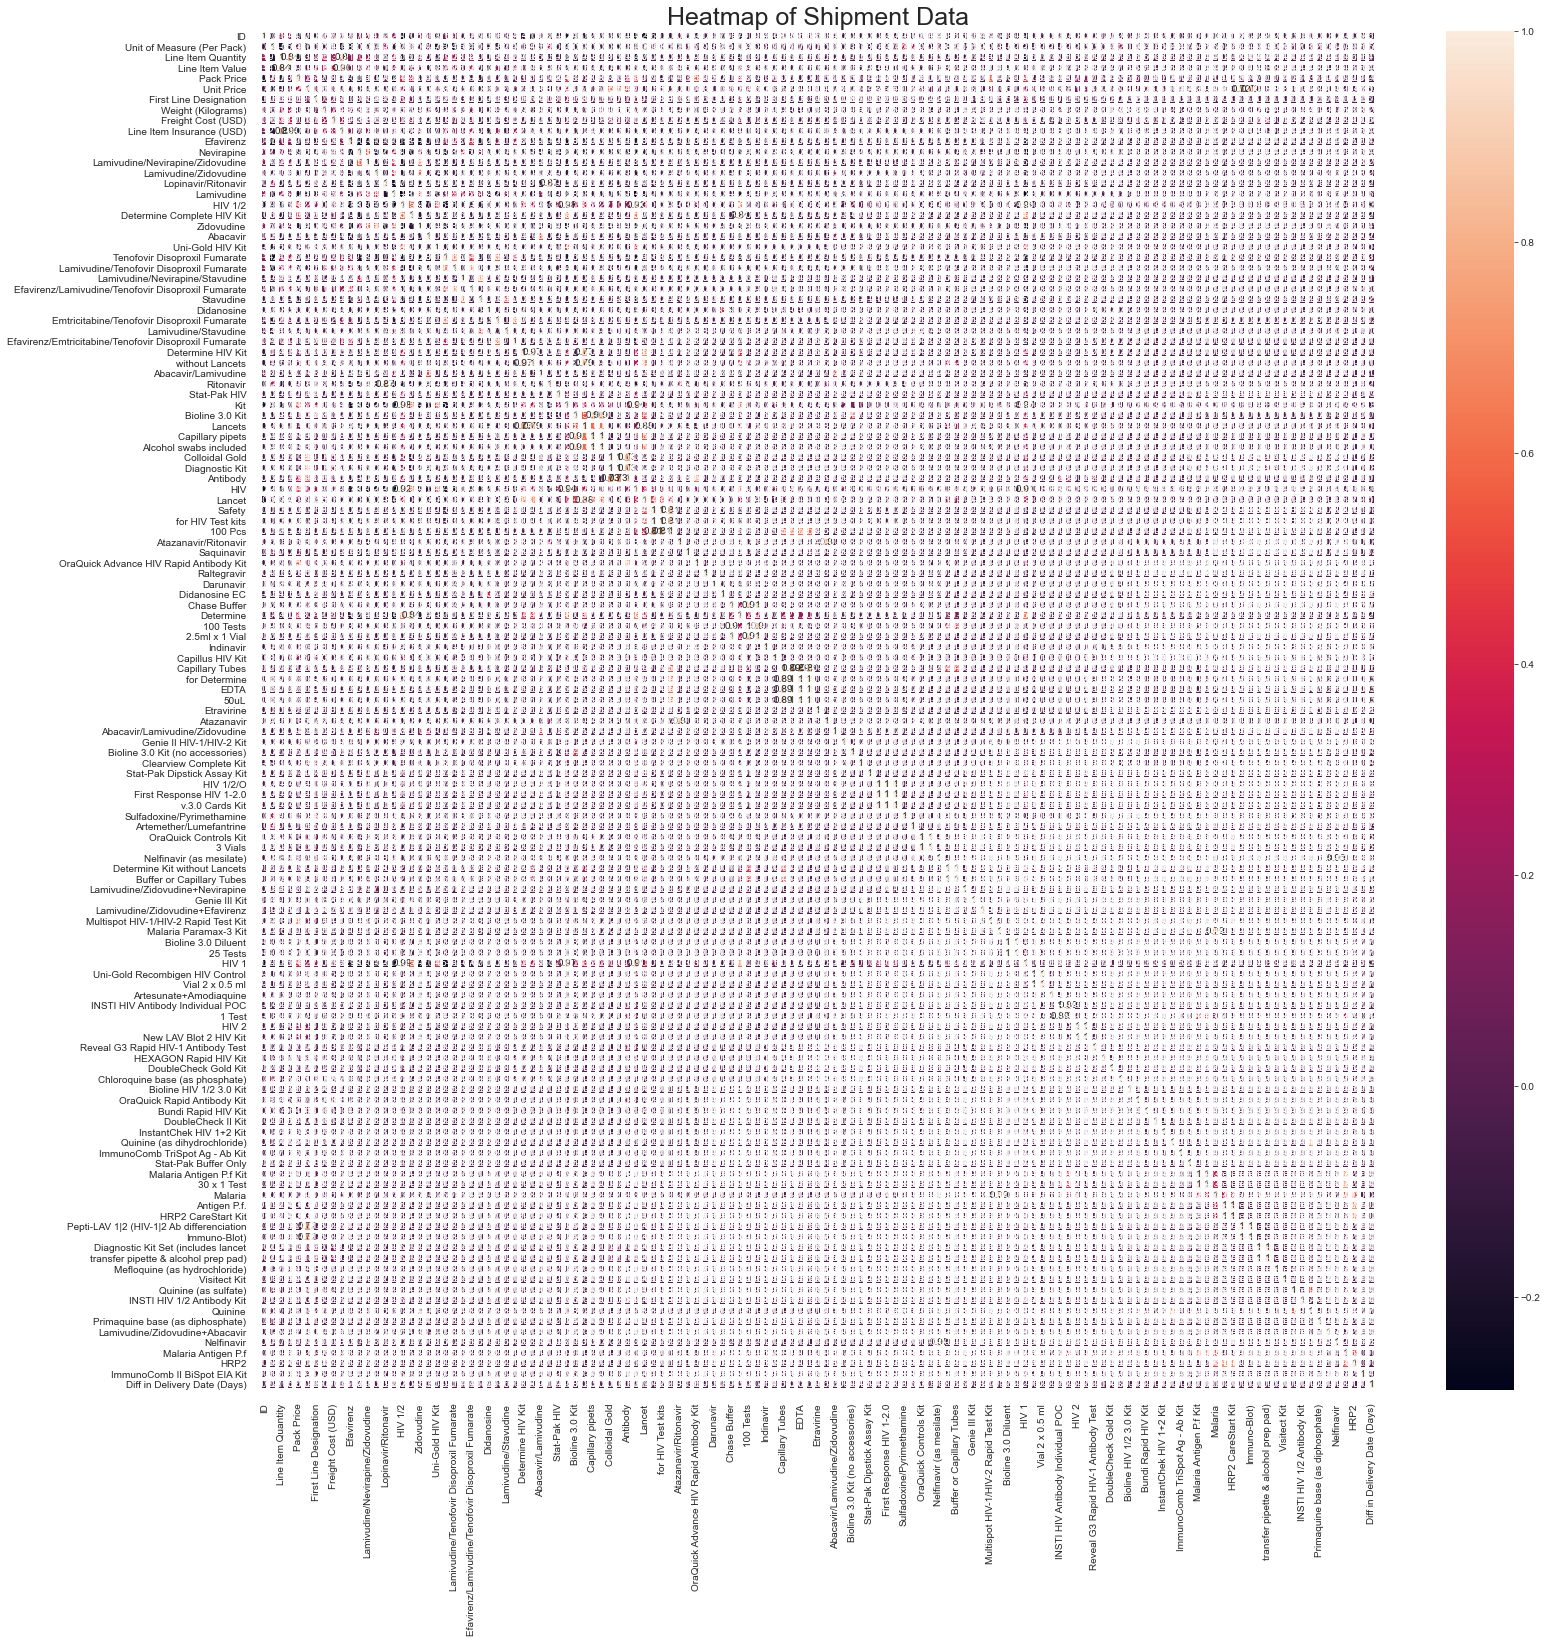

In [56]:
plt.figure(figsize = (25,25))
ax = sns.heatmap(df.corr(), annot= True, linewidth = 3)
ax.tick_params(size = 10, color = 'k', labelsize = 10, )
plt.title("Heatmap of Shipment Data", fontsize = 25)
plt.show()

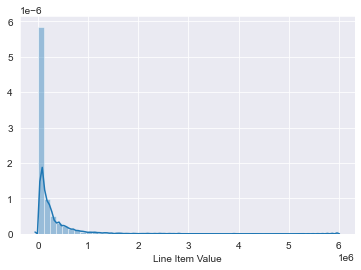

In [57]:
sns.distplot(df['Line Item Value'])

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Columns: 152 entries, ID to Diff in Delivery Date (Days)
dtypes: datetime64[ns](2), float64(7), int64(122), object(21)
memory usage: 12.0+ MB


In [59]:
df.isnull().sum()

ID                              0
Project Code                    0
PQ #                            0
PO / SO #                       0
ASN/DN #                        0
                               ..
Nelfinavir                      0
Malaria Antigen P.f             0
HRP2                            0
ImmunoComb II BiSpot EIA Kit    0
Diff in Delivery Date (Days)    0
Length: 152, dtype: int64

In [60]:
df.dropna(axis=0,subset = ['Shipment Mode'], inplace = True)

In [61]:
df

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),Efavirenz,Nevirapine,Lamivudine/Nevirapine/Zidovudine,Lamivudine/Zidovudine,Lopinavir/Ritonavir,Lamivudine,HIV 1/2,Determine Complete HIV Kit,Zidovudine,Abacavir,Uni-Gold HIV Kit,Tenofovir Disoproxil Fumarate,Lamivudine/Tenofovir Disoproxil Fumarate,Lamivudine/Nevirapine/Stavudine,Efavirenz/Lamivudine/Tenofovir Disoproxil Fumarate,Stavudine,Didanosine,Emtricitabine/Tenofovir Disoproxil Fumarate,Lamivudine/Stavudine,Efavirenz/Emtricitabine/Tenofovir Disoproxil Fumarate,Determine HIV Kit,without Lancets,Abacavir/Lamivudine,Ritonavir,Stat-Pak HIV,Kit,Bioline 3.0 Kit,Lancets,Capillary pipets,Alcohol swabs included,Colloidal Gold,Diagnostic Kit,Antibody,HIV,Lancet,Safety,for HIV Test kits,100 Pcs,Atazanavir/Ritonavir,Saquinavir,OraQuick Advance HIV Rapid Antibody Kit,Raltegravir,Darunavir,Didanosine EC,Chase Buffer,Determine,100 Tests,2.5ml x 1 Vial,Indinavir,Capillus HIV Kit,Capillary Tubes,for Determine,EDTA,50uL,Etravirine,Atazanavir,Abacavir/Lamivudine/Zidovudine,Genie II HIV-1/HIV-2 Kit,Bioline 3.0 Kit (no accessories),Clearview Complete Kit,Stat-Pak Dipstick Assay Kit,HIV 1/2/O,First Response HIV 1-2.0,v.3.0 Cards Kit,Sulfadoxine/Pyrimethamine,Artemether/Lumefantrine,OraQuick Controls Kit,3 Vials,Nelfinavir (as mesilate),Determine Kit without Lancets,Buffer or Capillary Tubes,Lamivudine/Zidovudine+Nevirapine,Genie III Kit,Lamivudine/Zidovudine+Efavirenz,Multispot HIV-1/HIV-2 Rapid Test Kit,Malaria Paramax-3 Kit,Bioline 3.0 Diluent,25 Tests,HIV 1,Uni-Gold Recombigen HIV Control,Vial 2 x 0.5 ml,Artesunate+Amodiaquine,INSTI HIV Antibody Individual POC,1 Test,HIV 2,New LAV Blot 2 HIV Kit,Reveal G3 Rapid HIV-1 Antibody Test,HEXAGON Rapid HIV Kit,DoubleCheck Gold Kit,Chloroquine base (as phosphate),Bioline HIV 1/2 3.0 Kit,OraQuick Rapid Antibody Kit,Bundi Rapid HIV Kit,DoubleCheck II Kit,InstantChek HIV 1+2 Kit,Quinine (as dihydrochloride),ImmunoComb TriSpot Ag - Ab Kit,Stat-Pak Buffer Only,Malaria Antigen P.f Kit,30 x 1 Test,Malaria,Antigen P.f.,HRP2 CareStart Kit,Pepti-LAV 1|2 (HIV-1|2 Ab differenciation,Immuno-Blot),Diagnostic Kit Set (includes lancet,transfer pipette & alcohol prep pad),Mefloquine (as hydrochloride),Visitect Kit,Quinine (as sulfate),INSTI HIV 1/2 Antibody Kit,Quinine,Primaquine base (as diphosphate),Lamivudine/Zidovudine+Abacavir,Nelfinavir,Malaria Antigen P.f,HRP2,ImmunoComb II BiSpot EIA Kit,Diff in Delivery Date (Days)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2006-06-02,2-Jun-06,2006-06-02,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,1,13.000000,780.340000,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2006-11-14,14-Nov-06,2006-11-14,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",1,358.000000,4521.500000,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [62]:
dt = df.select_dtypes(include='datetime')

In [63]:
dt

,Scheduled Delivery Date,Delivery Recorded Date
0,2006-06-02,2006-06-02
1,2006-11-14,2006-11-14
2,2006-08-27,2006-08-27
3,2006-09-01,2006-09-01
4,2006-08-11,2006-08-11
...,...,...
10319,2015-07-31,2015-07-20
10320,2015-07-31,2015-08-07
10321,2015-08-31,2015-09-03
10322,2015-09-09,2015-08-11


In [64]:
for col in ['Scheduled Delivery Date']:
    df[col+' day'] = pd.DatetimeIndex(df[col]).day
    df[col+' month'] = pd.DatetimeIndex(df[col]).month
    df[col+' year'] = pd.DatetimeIndex(df[col]).year
    df.drop(col,axis=1,inplace=True)

In [65]:
df['Diff in Delivery Date (Days)'] = df['Diff in Delivery Date (Days)'].astype('float64')

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9964 entries, 0 to 10323
Columns: 154 entries, ID to Scheduled Delivery Date year
dtypes: datetime64[ns](1), float64(7), int64(125), object(21)
memory usage: 11.8+ MB


In [67]:
drop_columns = ['ID','PQ #','PO / SO #','ASN/DN #','PQ First Sent to Client Date','PO Sent to Vendor Date','Delivered to Client Date','Item Description','Molecule/Test Type','Dosage','Delivery Recorded Date']
cat_cols= ['Project Code','Product Group','Country','Managed By','Shipment Mode', 'Fulfill Via', 'Vendor INCO Term',  'Sub Classification','Vendor','Dosage Form', 'Brand','Manufacturing Site']

In [68]:
len(df['Dosage'].value_counts())

54

In [69]:
df

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),Efavirenz,Nevirapine,Lamivudine/Nevirapine/Zidovudine,Lamivudine/Zidovudine,Lopinavir/Ritonavir,Lamivudine,HIV 1/2,Determine Complete HIV Kit,Zidovudine,Abacavir,Uni-Gold HIV Kit,Tenofovir Disoproxil Fumarate,Lamivudine/Tenofovir Disoproxil Fumarate,Lamivudine/Nevirapine/Stavudine,Efavirenz/Lamivudine/Tenofovir Disoproxil Fumarate,Stavudine,Didanosine,Emtricitabine/Tenofovir Disoproxil Fumarate,Lamivudine/Stavudine,Efavirenz/Emtricitabine/Tenofovir Disoproxil Fumarate,Determine HIV Kit,without Lancets,Abacavir/Lamivudine,Ritonavir,Stat-Pak HIV,Kit,Bioline 3.0 Kit,Lancets,Capillary pipets,Alcohol swabs included,Colloidal Gold,Diagnostic Kit,Antibody,HIV,Lancet,Safety,for HIV Test kits,100 Pcs,Atazanavir/Ritonavir,Saquinavir,OraQuick Advance HIV Rapid Antibody Kit,Raltegravir,Darunavir,Didanosine EC,Chase Buffer,Determine,100 Tests,2.5ml x 1 Vial,Indinavir,Capillus HIV Kit,Capillary Tubes,for Determine,EDTA,50uL,Etravirine,Atazanavir,Abacavir/Lamivudine/Zidovudine,Genie II HIV-1/HIV-2 Kit,Bioline 3.0 Kit (no accessories),Clearview Complete Kit,Stat-Pak Dipstick Assay Kit,HIV 1/2/O,First Response HIV 1-2.0,v.3.0 Cards Kit,Sulfadoxine/Pyrimethamine,Artemether/Lumefantrine,OraQuick Controls Kit,3 Vials,Nelfinavir (as mesilate),Determine Kit without Lancets,Buffer or Capillary Tubes,Lamivudine/Zidovudine+Nevirapine,Genie III Kit,Lamivudine/Zidovudine+Efavirenz,Multispot HIV-1/HIV-2 Rapid Test Kit,Malaria Paramax-3 Kit,Bioline 3.0 Diluent,25 Tests,HIV 1,Uni-Gold Recombigen HIV Control,Vial 2 x 0.5 ml,Artesunate+Amodiaquine,INSTI HIV Antibody Individual POC,1 Test,HIV 2,New LAV Blot 2 HIV Kit,Reveal G3 Rapid HIV-1 Antibody Test,HEXAGON Rapid HIV Kit,DoubleCheck Gold Kit,Chloroquine base (as phosphate),Bioline HIV 1/2 3.0 Kit,OraQuick Rapid Antibody Kit,Bundi Rapid HIV Kit,DoubleCheck II Kit,InstantChek HIV 1+2 Kit,Quinine (as dihydrochloride),ImmunoComb TriSpot Ag - Ab Kit,Stat-Pak Buffer Only,Malaria Antigen P.f Kit,30 x 1 Test,Malaria,Antigen P.f.,HRP2 CareStart Kit,Pepti-LAV 1|2 (HIV-1|2 Ab differenciation,Immuno-Blot),Diagnostic Kit Set (includes lancet,transfer pipette & alcohol prep pad),Mefloquine (as hydrochloride),Visitect Kit,Quinine (as sulfate),INSTI HIV 1/2 Antibody Kit,Quinine,Primaquine base (as diphosphate),Lamivudine/Zidovudine+Abacavir,Nelfinavir,Malaria Antigen P.f,HRP2,ImmunoComb II BiSpot EIA Kit,Diff in Delivery Date (Days),Scheduled Delivery Date day,Scheduled Delivery Date month,Scheduled Delivery Date year
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2006-06-02,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...","HIV, Reveal G3 Rapid HIV-1 Antibody Test",Reveal,NaN,Test kit,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,1,13.000000,780.340000,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,2,6,2006
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,2006-11-14,ARV,Pediatric,Aurobindo Pharma Limited,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",1,358.000000,4521.500000,0.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [70]:
df = df.drop(columns = drop_columns, axis = 1)

In [71]:
# Identify number of categorical features
for d in df.columns:
    if(df[d].dtype == 'O'):
        print(d,': ', df[d].nunique())

Project Code :  142
Country :  43
Managed By :  4
Fulfill Via :  2
Vendor INCO Term :  8
Shipment Mode :  4
Product Group :  5
Sub Classification :  6
Vendor :  72
Brand :  47
Dosage Form :  17
Manufacturing Site :  88


In [72]:
# Encode categorical fields as binary 
df = pd.get_dummies(df,sparse=False,columns=cat_cols)

In [73]:
df

,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),Efavirenz,Nevirapine,Lamivudine/Nevirapine/Zidovudine,Lamivudine/Zidovudine,Lopinavir/Ritonavir,Lamivudine,HIV 1/2,Determine Complete HIV Kit,Zidovudine,Abacavir,Uni-Gold HIV Kit,Tenofovir Disoproxil Fumarate,Lamivudine/Tenofovir Disoproxil Fumarate,Lamivudine/Nevirapine/Stavudine,Efavirenz/Lamivudine/Tenofovir Disoproxil Fumarate,Stavudine,Didanosine,Emtricitabine/Tenofovir Disoproxil Fumarate,Lamivudine/Stavudine,Efavirenz/Emtricitabine/Tenofovir Disoproxil Fumarate,Determine HIV Kit,without Lancets,Abacavir/Lamivudine,Ritonavir,Stat-Pak HIV,Kit,Bioline 3.0 Kit,Lancets,Capillary pipets,Alcohol swabs included,Colloidal Gold,Diagnostic Kit,Antibody,HIV,Lancet,Safety,for HIV Test kits,100 Pcs,Atazanavir/Ritonavir,Saquinavir,OraQuick Advance HIV Rapid Antibody Kit,Raltegravir,Darunavir,Didanosine EC,Chase Buffer,Determine,100 Tests,2.5ml x 1 Vial,Indinavir,Capillus HIV Kit,Capillary Tubes,for Determine,EDTA,50uL,Etravirine,Atazanavir,Abacavir/Lamivudine/Zidovudine,Genie II HIV-1/HIV-2 Kit,Bioline 3.0 Kit (no accessories),Clearview Complete Kit,Stat-Pak Dipstick Assay Kit,HIV 1/2/O,First Response HIV 1-2.0,v.3.0 Cards Kit,Sulfadoxine/Pyrimethamine,Artemether/Lumefantrine,OraQuick Controls Kit,3 Vials,Nelfinavir (as mesilate),Determine Kit without Lancets,Buffer or Capillary Tubes,Lamivudine/Zidovudine+Nevirapine,Genie III Kit,Lamivudine/Zidovudine+Efavirenz,Multispot HIV-1/HIV-2 Rapid Test Kit,Malaria Paramax-3 Kit,Bioline 3.0 Diluent,25 Tests,HIV 1,Uni-Gold Recombigen HIV Control,Vial 2 x 0.5 ml,Artesunate+Amodiaquine,INSTI HIV Antibody Individual POC,1 Test,HIV 2,New LAV Blot 2 HIV Kit,Reveal G3 Rapid HIV-1 Antibody Test,HEXAGON Rapid HIV Kit,DoubleCheck Gold Kit,Chloroquine base (as phosphate),Bioline HIV 1/2 3.0 Kit,OraQuick Rapid Antibody Kit,Bundi Rapid HIV Kit,DoubleCheck II Kit,InstantChek HIV 1+2 Kit,Quinine (as dihydrochloride),ImmunoComb TriSpot Ag - Ab Kit,Stat-Pak Buffer Only,Malaria Antigen P.f Kit,30 x 1 Test,Malaria,Antigen P.f.,HRP2 CareStart Kit,Pepti-LAV 1|2 (HIV-1|2 Ab differenciation,Immuno-Blot),Diagnostic Kit Set (includes lancet,transfer pipette & alcohol prep pad),Mefloquine (as hydrochloride),Visitect Kit,Quinine (as sulfate),INSTI HIV 1/2 Antibody Kit,Quinine,Primaquine base (as diphosphate),Lamivudine/Zidovudine+Abacavir,Nelfinavir,Malaria Antigen P.f,HRP2,ImmunoComb II BiSpot EIA Kit,Diff in Delivery Date (Days),Scheduled Delivery Date day,Scheduled Delivery Date month,Scheduled Delivery Date year,Project Code_100-BJ-T30,Project Code_100-BW-T01,Project Code_100-BZ-T30,Project Code_100-CI-T01,Project Code_100-DO-T30,Project Code_100-GH-T01,Project Code_100-GH-T30,Project Code_100-GN-T30,Project Code_100-HT-T01,Project Code_100-KZ-T01,Project Code_100-LB-T01,Project Code_100-PK-T01,Project Code_100-SL-T01,Project Code_100-SN-T01,Project Code_100-SZ-T01,Project Code_100-ZM-T30,Project Code_100-ZW-T01,Project Code_100-ZW-T30,Project Code_101-AF-T30,Project Code_101-CD-T30,Project Code_101-KE-T30,Project Code_101-ZA-T30,Project Code_102-AO-T30,Project Code_102-BI-T30,Project Code_102-BW-T01,Project Code_102-BW-T30,Project Code_102-CD-T30,Project Code_102-DO-T30,Project Code_102-GY-T01,Project Code_102-GY-T30,Project Code_102-KE-T01,Project Code_102-KE-T30,Project Code_102-LS-T01,Project Code_102-LY-T30,Project Code_102-ML-T30,Project Code_102-MW-T30,Project Code_102-NG-T01,Project Code_102-SD-T30,Project Code_102-SS-T30,Project Code_102-SZ-T30,Project Code_102-UG-T30,Project Code_102-ZW-T30,Project Code_103-AO-T30,Project Code_103-CD-T30,Project Code_103-CM-T30,Project Code_103-DO-T30,Project Code_103-KE-T30,Project Code_103-ML-T30,Project Code_103-MW-T30,Project Code_103-SS-T30,Project Code_103-UG-T30,Project Code_103-ZW-T30,Project Code_104-BW-T30,Project Code_104-CI-T01,Project Code_104-CI-T30,Project Code_104-SZ-T30,Project Code_105-

In [74]:
df.isnull().sum().sum()

0

## Saving the Preprocessed Data

In [75]:
df = df.astype('float64')

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9964 entries, 0 to 10323
Columns: 569 entries, Unit of Measure (Per Pack) to Manufacturing Site_bioLytical Laboratories
dtypes: float64(569)
memory usage: 43.3 MB


In [77]:
df.isnull().sum().sum()

0

In [78]:
for i in df.columns:
    print(i , " : " , df[i].isnull().sum())

Unit of Measure (Per Pack)  :  0
Line Item Quantity  :  0
Line Item Value  :  0
Pack Price  :  0
Unit Price  :  0
First Line Designation  :  0
Weight (Kilograms)  :  0
Freight Cost (USD)  :  0
Line Item Insurance (USD)  :  0
Efavirenz  :  0
Nevirapine  :  0
Lamivudine/Nevirapine/Zidovudine  :  0
Lamivudine/Zidovudine  :  0
Lopinavir/Ritonavir  :  0
Lamivudine  :  0
HIV 1/2  :  0
Determine Complete HIV Kit  :  0
Zidovudine  :  0
Abacavir  :  0
Uni-Gold HIV Kit  :  0
Tenofovir Disoproxil Fumarate  :  0
Lamivudine/Tenofovir Disoproxil Fumarate  :  0
Lamivudine/Nevirapine/Stavudine  :  0
Efavirenz/Lamivudine/Tenofovir Disoproxil Fumarate  :  0
Stavudine  :  0
Didanosine  :  0
Emtricitabine/Tenofovir Disoproxil Fumarate  :  0
Lamivudine/Stavudine  :  0
Efavirenz/Emtricitabine/Tenofovir Disoproxil Fumarate  :  0
Determine HIV Kit  :  0
without Lancets  :  0
Abacavir/Lamivudine  :  0
Ritonavir  :  0
Stat-Pak HIV  :  0
Kit  :  0
Bioline 3.0 Kit  :  0
Lancets  :  0
Capillary pipets  :  0
Alcoho

Country_Lebanon  :  0
Country_Lesotho  :  0
Country_Liberia  :  0
Country_Libya  :  0
Country_Malawi  :  0
Country_Mali  :  0
Country_Mozambique  :  0
Country_Namibia  :  0
Country_Nigeria  :  0
Country_Pakistan  :  0
Country_Rwanda  :  0
Country_Senegal  :  0
Country_Sierra Leone  :  0
Country_South Africa  :  0
Country_South Sudan  :  0
Country_Sudan  :  0
Country_Swaziland  :  0
Country_Tanzania  :  0
Country_Togo  :  0
Country_Uganda  :  0
Country_Vietnam  :  0
Country_Zambia  :  0
Country_Zimbabwe  :  0
Managed By_Ethiopia Field Office  :  0
Managed By_Haiti Field Office  :  0
Managed By_PMO - US  :  0
Managed By_South Africa Field Office  :  0
Shipment Mode_Air  :  0
Shipment Mode_Air Charter  :  0
Shipment Mode_Ocean  :  0
Shipment Mode_Truck  :  0
Fulfill Via_Direct Drop  :  0
Fulfill Via_From RDC  :  0
Vendor INCO Term_CIF  :  0
Vendor INCO Term_CIP  :  0
Vendor INCO Term_DAP  :  0
Vendor INCO Term_DDP  :  0
Vendor INCO Term_DDU  :  0
Vendor INCO Term_EXW  :  0
Vendor INCO Ter

In [79]:
df.to_csv(r"Dataset/Preprocessed_SCMS_Delivery_History_Dataset.csv", index = False)

In [80]:
df

,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD),Efavirenz,Nevirapine,Lamivudine/Nevirapine/Zidovudine,Lamivudine/Zidovudine,Lopinavir/Ritonavir,Lamivudine,HIV 1/2,Determine Complete HIV Kit,Zidovudine,Abacavir,Uni-Gold HIV Kit,Tenofovir Disoproxil Fumarate,Lamivudine/Tenofovir Disoproxil Fumarate,Lamivudine/Nevirapine/Stavudine,Efavirenz/Lamivudine/Tenofovir Disoproxil Fumarate,Stavudine,Didanosine,Emtricitabine/Tenofovir Disoproxil Fumarate,Lamivudine/Stavudine,Efavirenz/Emtricitabine/Tenofovir Disoproxil Fumarate,Determine HIV Kit,without Lancets,Abacavir/Lamivudine,Ritonavir,Stat-Pak HIV,Kit,Bioline 3.0 Kit,Lancets,Capillary pipets,Alcohol swabs included,Colloidal Gold,Diagnostic Kit,Antibody,HIV,Lancet,Safety,for HIV Test kits,100 Pcs,Atazanavir/Ritonavir,Saquinavir,OraQuick Advance HIV Rapid Antibody Kit,Raltegravir,Darunavir,Didanosine EC,Chase Buffer,Determine,100 Tests,2.5ml x 1 Vial,Indinavir,Capillus HIV Kit,Capillary Tubes,for Determine,EDTA,50uL,Etravirine,Atazanavir,Abacavir/Lamivudine/Zidovudine,Genie II HIV-1/HIV-2 Kit,Bioline 3.0 Kit (no accessories),Clearview Complete Kit,Stat-Pak Dipstick Assay Kit,HIV 1/2/O,First Response HIV 1-2.0,v.3.0 Cards Kit,Sulfadoxine/Pyrimethamine,Artemether/Lumefantrine,OraQuick Controls Kit,3 Vials,Nelfinavir (as mesilate),Determine Kit without Lancets,Buffer or Capillary Tubes,Lamivudine/Zidovudine+Nevirapine,Genie III Kit,Lamivudine/Zidovudine+Efavirenz,Multispot HIV-1/HIV-2 Rapid Test Kit,Malaria Paramax-3 Kit,Bioline 3.0 Diluent,25 Tests,HIV 1,Uni-Gold Recombigen HIV Control,Vial 2 x 0.5 ml,Artesunate+Amodiaquine,INSTI HIV Antibody Individual POC,1 Test,HIV 2,New LAV Blot 2 HIV Kit,Reveal G3 Rapid HIV-1 Antibody Test,HEXAGON Rapid HIV Kit,DoubleCheck Gold Kit,Chloroquine base (as phosphate),Bioline HIV 1/2 3.0 Kit,OraQuick Rapid Antibody Kit,Bundi Rapid HIV Kit,DoubleCheck II Kit,InstantChek HIV 1+2 Kit,Quinine (as dihydrochloride),ImmunoComb TriSpot Ag - Ab Kit,Stat-Pak Buffer Only,Malaria Antigen P.f Kit,30 x 1 Test,Malaria,Antigen P.f.,HRP2 CareStart Kit,Pepti-LAV 1|2 (HIV-1|2 Ab differenciation,Immuno-Blot),Diagnostic Kit Set (includes lancet,transfer pipette & alcohol prep pad),Mefloquine (as hydrochloride),Visitect Kit,Quinine (as sulfate),INSTI HIV 1/2 Antibody Kit,Quinine,Primaquine base (as diphosphate),Lamivudine/Zidovudine+Abacavir,Nelfinavir,Malaria Antigen P.f,HRP2,ImmunoComb II BiSpot EIA Kit,Diff in Delivery Date (Days),Scheduled Delivery Date day,Scheduled Delivery Date month,Scheduled Delivery Date year,Project Code_100-BJ-T30,Project Code_100-BW-T01,Project Code_100-BZ-T30,Project Code_100-CI-T01,Project Code_100-DO-T30,Project Code_100-GH-T01,Project Code_100-GH-T30,Project Code_100-GN-T30,Project Code_100-HT-T01,Project Code_100-KZ-T01,Project Code_100-LB-T01,Project Code_100-PK-T01,Project Code_100-SL-T01,Project Code_100-SN-T01,Project Code_100-SZ-T01,Project Code_100-ZM-T30,Project Code_100-ZW-T01,Project Code_100-ZW-T30,Project Code_101-AF-T30,Project Code_101-CD-T30,Project Code_101-KE-T30,Project Code_101-ZA-T30,Project Code_102-AO-T30,Project Code_102-BI-T30,Project Code_102-BW-T01,Project Code_102-BW-T30,Project Code_102-CD-T30,Project Code_102-DO-T30,Project Code_102-GY-T01,Project Code_102-GY-T30,Project Code_102-KE-T01,Project Code_102-KE-T30,Project Code_102-LS-T01,Project Code_102-LY-T30,Project Code_102-ML-T30,Project Code_102-MW-T30,Project Code_102-NG-T01,Project Code_102-SD-T30,Project Code_102-SS-T30,Project Code_102-SZ-T30,Project Code_102-UG-T30,Project Code_102-ZW-T30,Project Code_103-AO-T30,Project Code_103-CD-T30,Project Code_103-CM-T30,Project Code_103-DO-T30,Project Code_103-KE-T30,Project Code_103-ML-T30,Project Code_103-MW-T30,Project Code_103-SS-T30,Project Code_103-UG-T30,Project Code_103-ZW-T30,Project Code_104-BW-T30,Project Code_104-CI-T01,Project Code_104-CI-T30,Project Code_104-SZ-T30,Project Code_105-